# Matemática para Ciencia de los Datos
# Trabajo Práctico 6

Profesor: Luis Alexánder Calvo Valverde 

Instituto Tecnológico de Costa Rica, 

Programa Ciencia de Datos

---

Fecha de entrega: Jueves 14 de Diciembre del 2023, a más tardar a las 3:00 pm.

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo jupyter ( .IPYNB ). 

Estudiante:
1. **Yoksan Varela Cambronero**



## Ejercicio 1 (50 puntos)



El algoritmo del descenso de gradiente sigue la idea de modificar el punto óptimo estimado de forma iterativa. Para una función en una
variable $f\left(x\right)$, la estimación del punto óptimo en una iteración $i+1$ está dada por: 

\begin{equation}
x\left(t+1\right)=x\left(t\right)+\alpha f'\left(x\left(t\right)\right)
\end{equation}

donde el coeficiente $\alpha$ determina el *grado de confianza o velocidad* con la que el proceso de optimización iterativa sigue
la dirección de la derivada. Para la optimización de una función multivariable $f\left(\overrightarrow{x}\left(t\right)\right)$ con $\overrightarrow{x}\in\mathbb{R}^{n}$, la posición óptima se estima usando el vector gradiente:

\begin{equation}
\overrightarrow{x}\left(t+1\right)=\overrightarrow{x}\left(t\right)+\alpha\nabla_{\overrightarrow{x}}f\left(\overrightarrow{x}\left(t\right)\right)
\end{equation}

Para la función: 

\begin{equation}
f\left(\overrightarrow{x}\right)=x^{2}-y^{2},
\end{equation}

Implemente la función en python denominada:

$$funcion\_SGD \left(tasa\_aprendizaje, iteraciones, xy, tolerancia\right)$$

donde los parámetros corresponden a:

* tasa_aprendizaje: es el $\alpha$
* iteraciones: es el máximo número de iteraciones a ejecutar
* xy: es el vector con los dos valores iniciales [x,y]
* tolerancia: es el valor mínimo para un cambio entre iteración. Si la función de costo no mejora en al menos "tolerancia", sale del ciclo de iteración.

**Nota:** 
1. Para iniciar la implementación puede utilizar el código en el cuaderno "070_1_LACV_Optimizacion".
1. Cada iteración le generará un vector con dos valores ($\overrightarrow{x}\left(t+1\right)$), por lo que para saber el valor de la función de pérdida en ese punto, evalúelo en la función inicial ($x^{2}-y^{2}$) para saber si aumentó o disminuyó.



---




In [29]:
# Librerias

import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA


In [30]:
# Funcion base: f(vX) = x^2 - y^2
def derivada_f(x,y):
    dp_x = 2*x
    dp_y = -2*y
    return dp_x,dp_y

# Funcion funcion_SDG:
def funcion_SDG(tasa_aprendizaje,interaciones,xy,tolerancia):
    iters = 0 #iteration counter
    previous_step_size = 1
    while previous_step_size > tolerancia and iters < interaciones:
        prev_array = xy
        #print(f"Array Previo:\n {prev_array}")
        
        der_x,der_y = derivada_f(prev_array[0],prev_array[1])
        xy = xy - tasa_aprendizaje * np.array([der_x,der_y]) #Grad descent
        #print(f"Array Actual:\n {xy}")
        
        previous_step_size_array = xy - prev_array #Change in array
        #print(f"Array del paso:\n {previous_step_size_array}")
        
        previous_step_size = LA.norm(previous_step_size_array,2)
        #print(f"Error del paso: {previous_step_size}")
        
        iters = iters+1 #iteration count
        if (iters % 10) == 0:
            print("Iteration",iters,"\nArray values are\n",xy) #Print iterations
            print("previous_step_size >>> ", previous_step_size)
        
    print("The local minimum occurs at\n", xy)
    return True

In [31]:
##############################################################################################################
## MAIN ##
# Parametros iniciales
initial_array = np.array([[1],[0]]) # The algorithm starts at x=3 and y=2
learning_rate = 0.01 # Learning rate alpha
precision = 0.0001 #This tells us when to stop the algorithm
max_iters = 10000 # maximum number of iterations

# Usando la funcion_SDG:
if(funcion_SDG(learning_rate,max_iters,initial_array,precision)):
    print("Ejecucion de la funcion exitosa")
else:
    print("Error en la ejecucion del la funcion SDG")    


Iteration 10 
Array values are
 [[2.45121842]
 [2.43798884]]
previous_step_size >>>  0.06919307181508401
Iteration 20 
Array values are
 [[2.00282392]
 [2.97189479]]
previous_step_size >>>  0.07117835672327973
Iteration 30 
Array values are
 [[1.63645296]
 [3.62272317]]
previous_step_size >>>  0.07849304768220412
Iteration 40 
Array values are
 [[1.33710121]
 [4.41607933]]
previous_step_size >>>  0.09078774579709772
Iteration 50 
Array values are
 [[1.09250904]
 [5.38317606]]
previous_step_size >>>  0.1078816040426907
Iteration 60 
Array values are
 [[0.89265943]
 [6.56206158]]
previous_step_size >>>  0.1299511467951438
Iteration 70 
Array values are
 [[0.72936774]
 [7.99911645]]
previous_step_size >>>  0.15755015336538164
Iteration 80 
Array values are
 [[0.59594655]
 [9.75087831]]
previous_step_size >>>  0.19158013075586502
Iteration 90 
Array values are
 [[ 0.48693172]
 [11.88626625]]
previous_step_size >>>  0.23327580295947947
Iteration 100 
Array values are
 [[ 0.39785867]
 [14.48

## Ejercicio 2

Para la función  $f_{1}\left(x_{1},x_{2}\right)=x_{1}^4 + x_{2}^4$

Realice lo siguiente:

1. En una celda de texto:

 - Calcule el vector gradiente. **(15 puntos)**

 - Calcule la matriz Hessiana. **(15 puntos)**

2. Para el resultado obtenido en el punto anterior: **(20 puntos)**
  - Evalúela en el punto $x_{1},x_{2}\in\left[4,4\right]$. 
  - Luego aplique el criterio de la segunda derivada parcial ¿qué conclusiones saca para ese punto? 

---

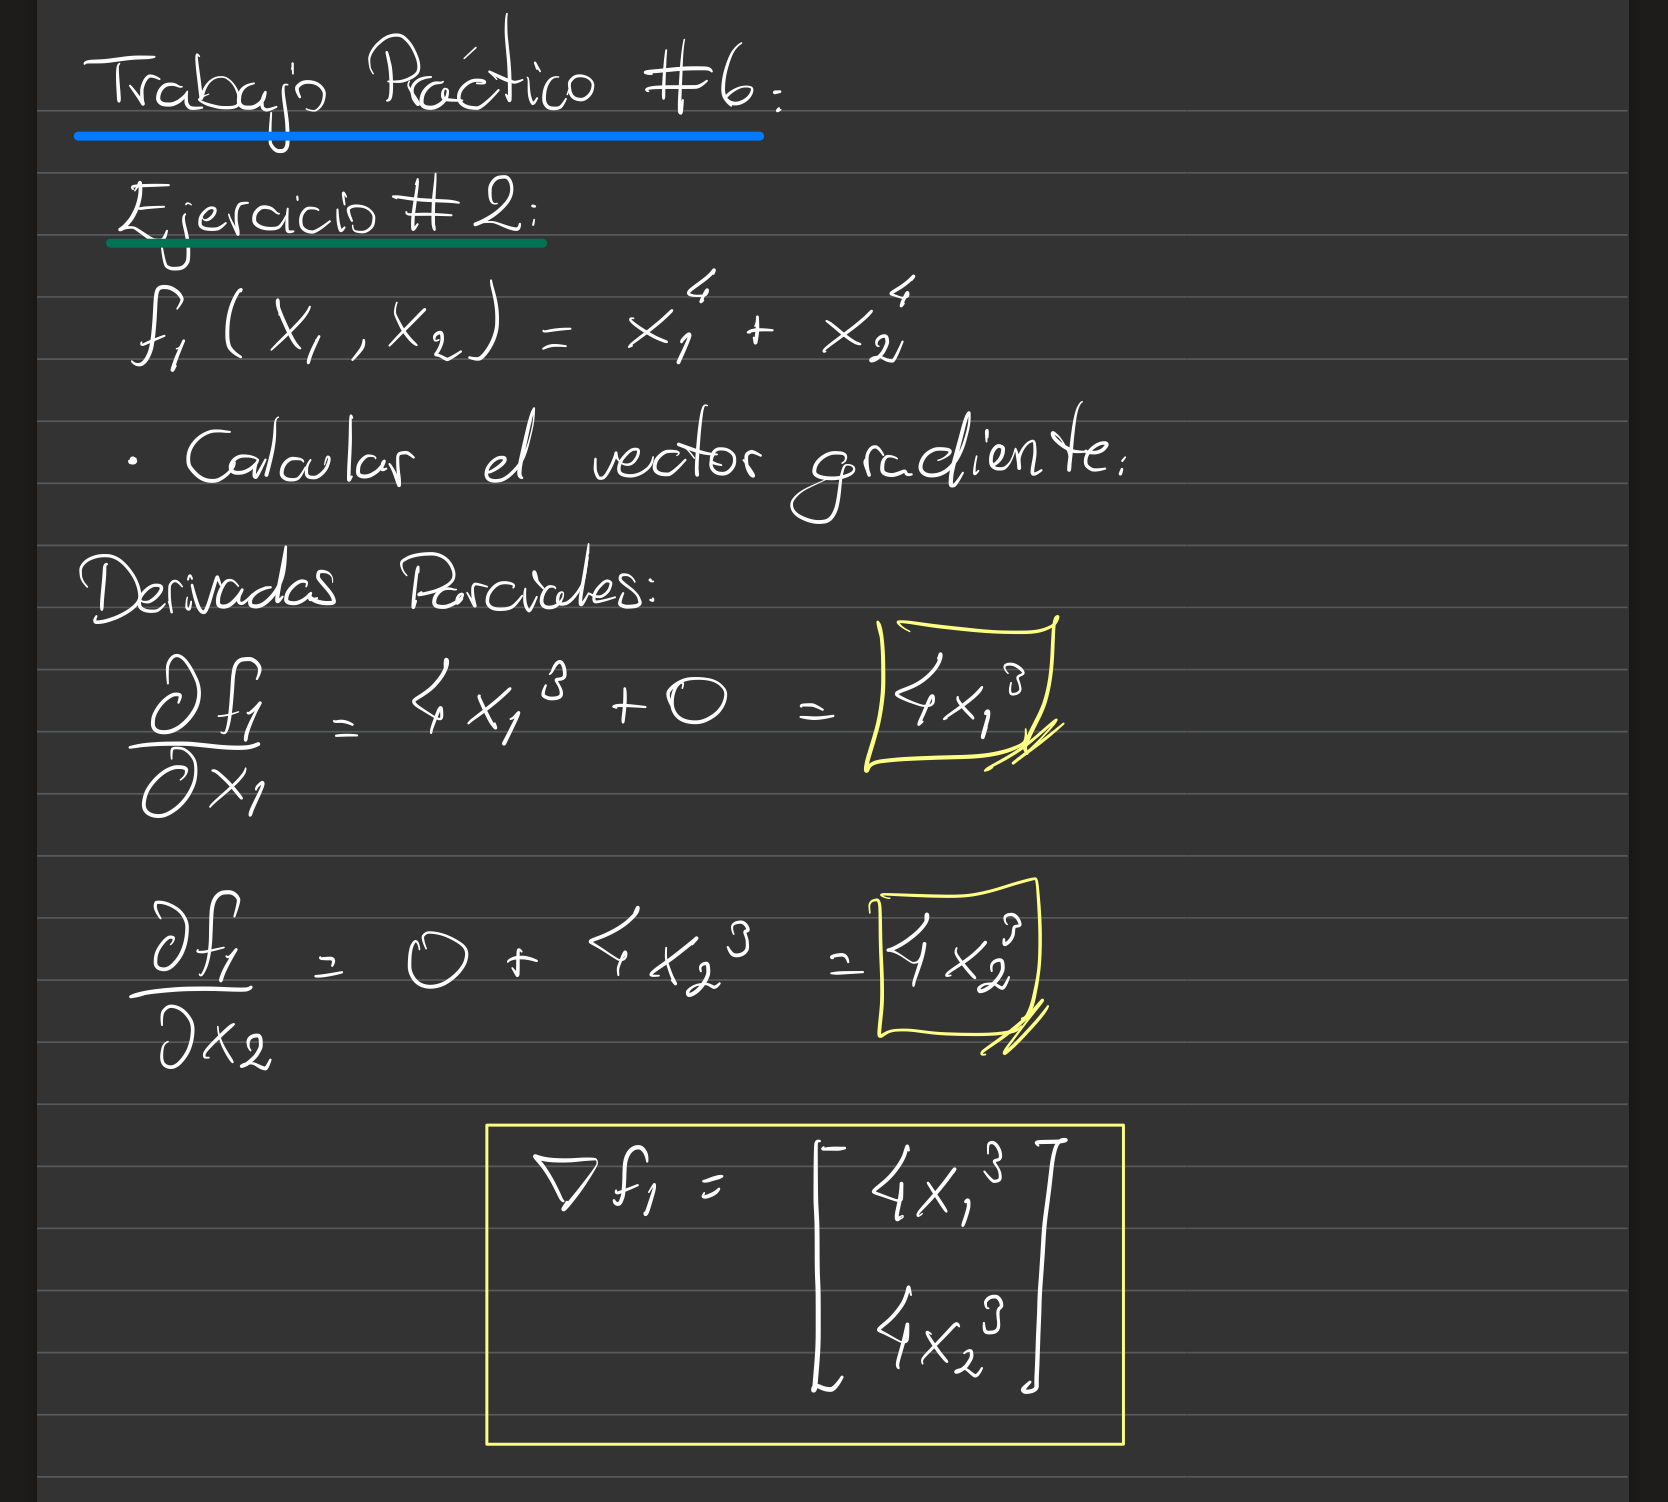

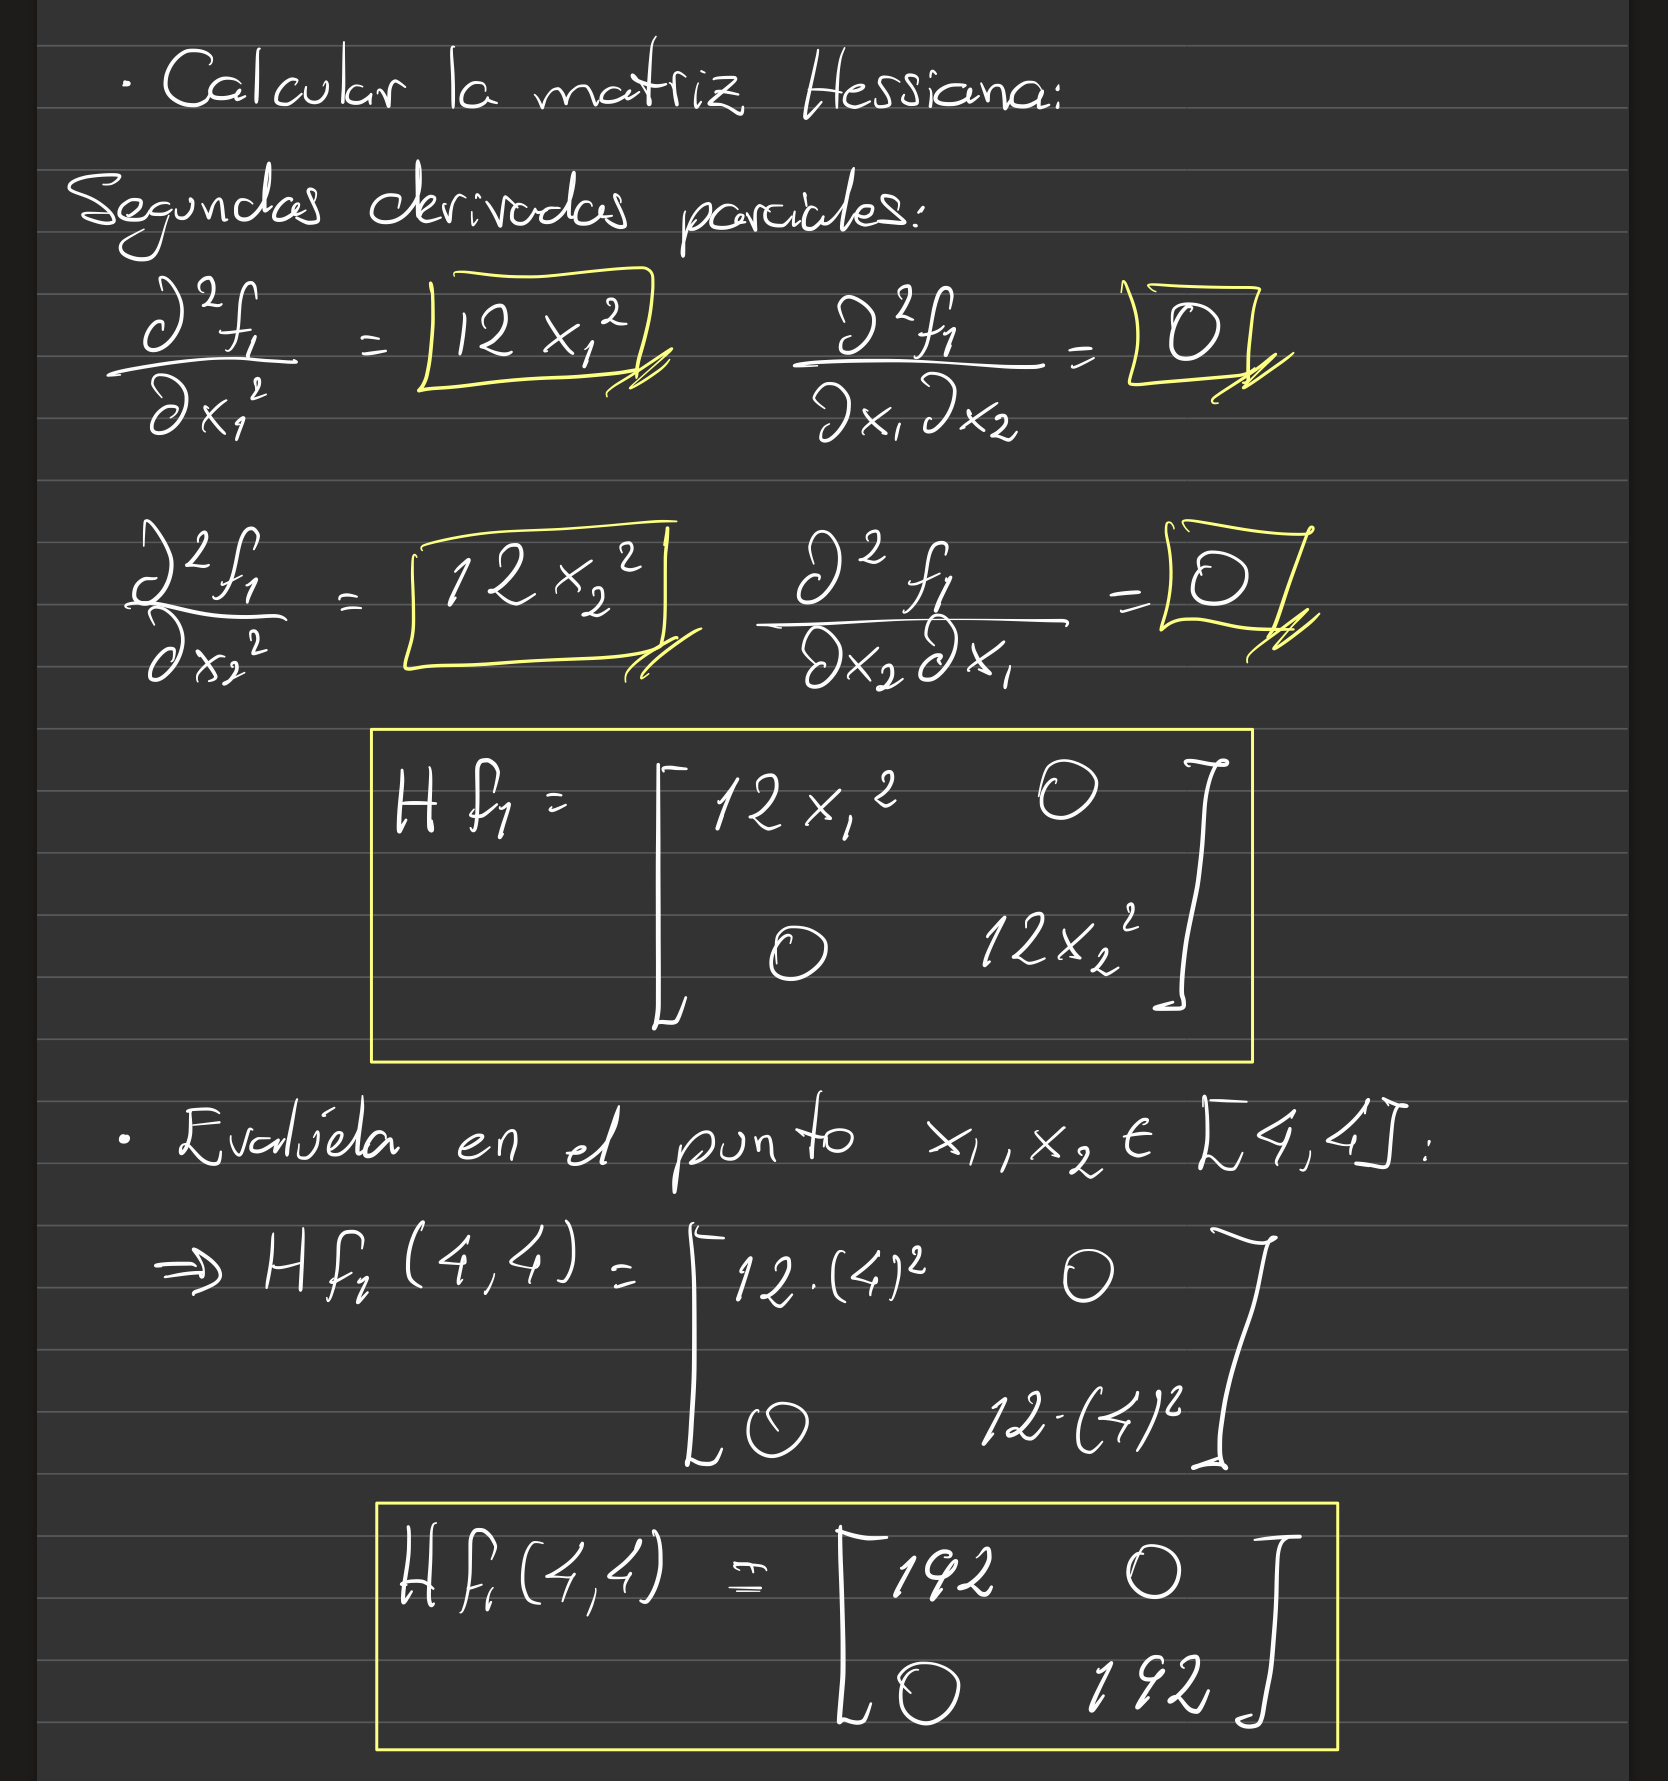

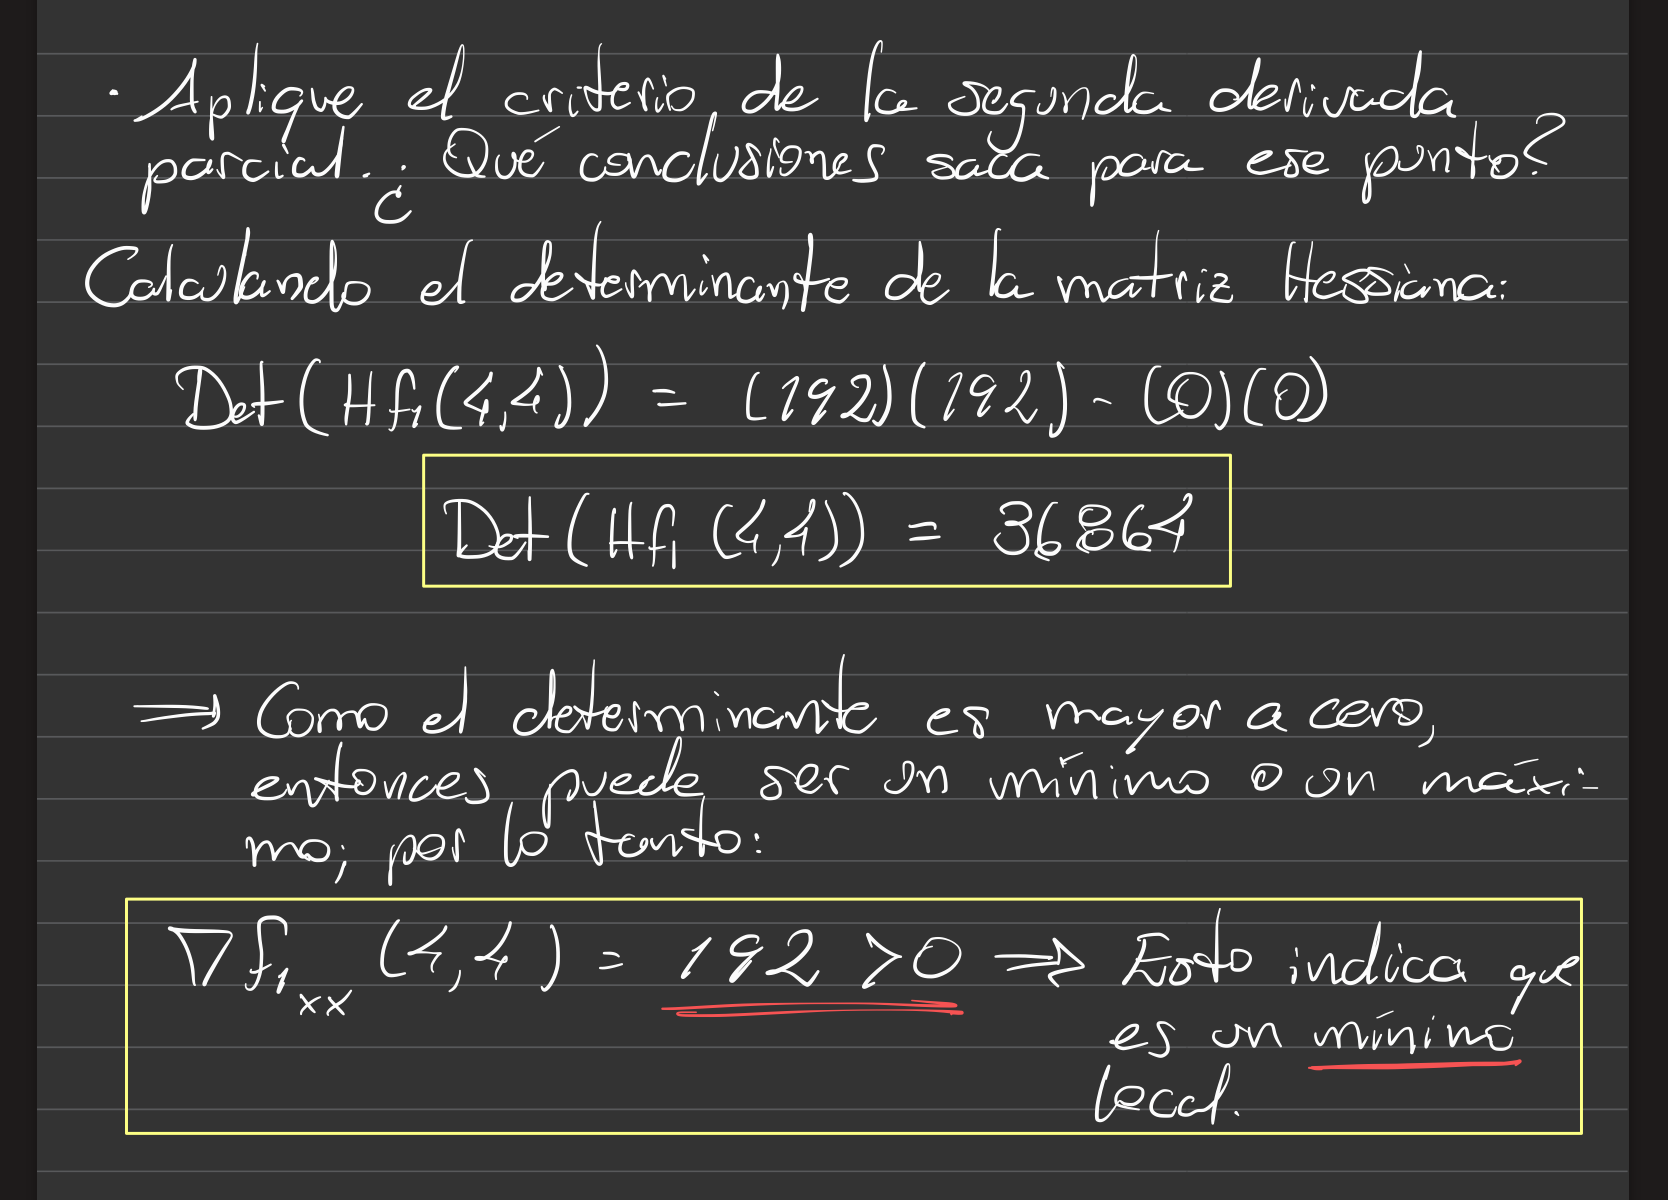